# Importar Librerias

In [2]:
import pandas as pd 
pd.options.plotting.backend = "plotly"
import numpy as np
import plotly.express as px
from scipy.stats import skew
from scipy.stats import kurtosis
import matplotlib.pyplot as plt
import seaborn as sns

# Load Dataset

In [3]:
data_train = pd.read_parquet('../data/interim/data_train_clean.parquet')

## Bivariate analysis
Descriptive statistics and analysis

### Numeric vs Numeric
- Scatter Plot
- Heatmap
- Correlation

In [5]:
numeric_keys = ['Efficiency', 'BoilTime', 'Color', 'BoilGravity', 'PrimaryTemp', 'ABV', 'FG', 'IBU', 'OG']
categoric_keys = ['BrewMethod', 'SugarScale', 'Style']

### Numeric vs Numeric

MemoryError: Unable to allocate 62.7 TiB for an array with shape (8622115733220,) and data type float64

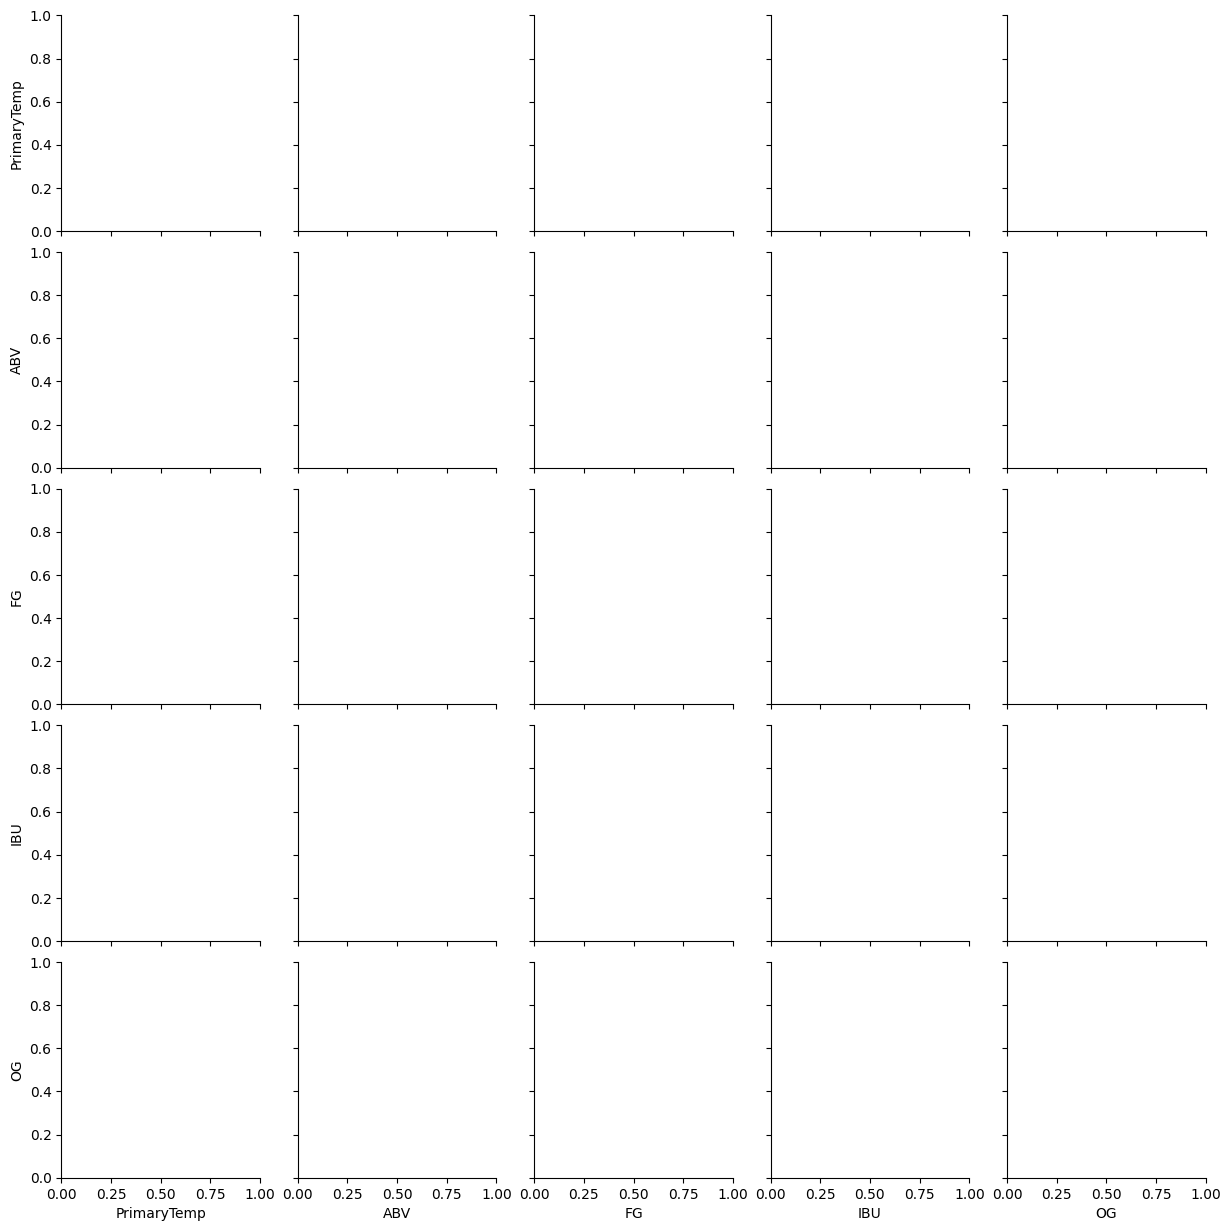

In [16]:
data_train_selected = data_train[['PrimaryTemp', 'ABV', 'FG', 'IBU', 'OG']]
sns.pairplot(data_train_selected)

In [15]:
title = "{x} vs {y}".format(x = numeric_keys[0], y=numeric_keys[1])
px.scatter(data_train, x=numeric_keys[0], y=numeric_keys[1], title=title)

### Categoricas vs Categoricas

- Two-way table
- Graficas de Barras apiladas
- Chi-Square Test

### Categoricas vs Numericas
- Z-Test/ T-Test
- ANOVA

## Procesamiento de Outliers
### Deteccion de Outliers (Univariables y Bi variables)
- Boxplots
- Scatter Plots
- Histogramas

### Remover Outliers
las opciones son:
- Borrar los datos atipicos (outliers) 
- Transformar la variable (Ej: escalar, cambiar a esccala Log o a Escala lineal)
- Reemplazar los outliers conla Media/ Moda/ Mediana (Mean/ Mode/ Median Imputation)
- Reemplazar valores con modelo predictivo
- Separarlos y analizarlos aparte (si son muchos outliers)


## Procesamiento de Outliers
### Deteccion de Outliers (Univariables y Bi variables)
- Boxplots
- Scatter Plots
- Histogramas

### Remover Outliers
las opciones son:
- Borrar los datos atipicos (outliers) 
- Transformar la variable (Ej: escalar, cambiar a esccala Log o a Escala lineal)
- Reemplazar los outliers conla Media/ Moda/ Mediana (Mean/ Mode/ Median Imputation)
- Reemplazar valores con modelo predictivo
- Separarlos y analizarlos aparte (si son muchos outliers)


## Feature Engineering 
### Transformacion de Variables
**Se usa cuando es necesario:**
- Cambiar la escala las variables (Normalizar, escalamiento, etc), esto no cambia la forma de la distribucion de los datos
- Cambiar relaciones No ineales en Lineales (Ej: cambiar la escala Logaritmica a lineal)
- Usar una la distribución simétrica en vez de una distribución sesgada o asimetrica, Para una la distribución sesgada a la derecha, tomamos la raíz cuadrada / cúbica o el logaritmo de la variable, y para la desviación a la izquierda, tomamos el cuadrado / cubo o exponencial de las variables.
- Cambair variables continuas a categoricas

Algunas transformaciones son:

#### Normalizacion

#### Escalamiento

#### Logaritmica

#### raíz cuadrada / cúbica

#### Binning , Cambios de Numericas a Categoricas

## Analisis Univariable y Bivariable Final
Luego de Realizar:
- Tratamiento de datos Nulos
- Tratamiento de outliers
- Transformacion de Variables

Es necesario realizar nuevamente analisis univarible y bivariable para identificar como cambiaron nuestros datos y para verificar si estan listos para usarse para crear un modelo.

### Creacion de Variables
pueden ser:
#### Crear Variables derivadas de Otras

#### Crear Variables de Categorico a Numerico
Puede ser
- Definir un numero a cada categoria
- One hot encoder (dummy columns)

## Reduccion de Dimensionalidad y Seleccion de Variables (PCA)

De ser necesario si tiene muchas variables o sospecha que aun tiene variables que no aportan mucho

# MODELAMIENTO DE LOS DATOS (MACHINE LEARNING)


# Validacion y Evaluacion Cruzada (k-fold Cross Validation)

Se hace seleccion de los mejores modelos usando el Training Set y k-fold Cross Validation

# Optimizacion de Hiper parametros (Hyper Parameter optimization)

Se seleccionan solo los mejores modelos para realizar el ajuste de hiperparametros, ya que tiene una carga computacional alta.

Al final se obtienen los parametros del mejor modelo

# Evaluacion final del modelo con el Test set

Tomar los parametros obtenidos en el paso anterior, se crea el modelo con esos pararmetros y se entrena el modelo con todos los datos del **Train -set**

Finalmente se realiza la evaluacion (segun su problema si es de regresion o de clasificacion) usando el **Test - set** para definir si el modelo obtenido esta bien. Compare los resultados con el **Train -set** vs los resultados con el **Test - set**

# Implementacion del Modelo (Deploying)
Con el análisis básico y el ajuste hecho, comienza el trabajo real (ingeniería).

El último paso para poner en produccion el modelo de prediccion sera:
1. Entrenarlo en todo el conjunto de datos nuevamente, para hacer un uso completo de todos los datos disponibles. 
2. Usar los mejores parámetros encontrados mediante la validación cruzada, por supuesto. Esto es muy similar a lo que hicimos al principio, pero esta vez teniendo una idea de su comportamiento y estabilidad. La evaluación se realizó con honestidad, en divisiones distintas de entrenamiento / prueba.

El predictor final se puede serializar y grabar en el disco, de modo que la próxima vez que lo usemos, podemos omitir todo el entrenamiento y usar el modelo capacitado directamente:

In [2]:
#import pickle # Esta es una libreria de serializacion nativa de python, puede tener problemas de seguridad
from joblib import dump # libreria de serializacion

# garbar el modelo en un archivo
#dump(Modelo_final, 'Nombre_Archivo_Modelo.joblib')

# Comunicacion de Resultados (Data Story Telling)

# Conclusiones

# Ayudas Y Referencias

- https://medium.com/@joserzapata/paso-a-paso-en-un-proyecto-machine-learning-bcdd0939d387
- [Proyecto de Principio a Final sobre readmision de pacientes con Diabetes](https://github.com/JoseRZapata/Readmission-ML-Project)

- [a-complete-machine-learning-walk-through-in-python-part-one](https://towardsdatascience.com/a-complete-machine-learning-walk-through-in-python-part-one-c62152f39420)


- [a-starter-pack-to-exploratory-data-analysis-with-python-pandas-seaborn-and-scikit-learn](https://towardsdatascience.com/a-starter-pack-to-exploratory-data-analysis-with-python-pandas-seaborn-and-scikit-learn-a77889485baf#249d)

- [a-data-science-for-good-machine-learning-project-walk-through-in-python-part-one](https://towardsdatascience.com/a-data-science-for-good-machine-learning-project-walk-through-in-python-part-one-1977dd701dbc)

- [Ejemplos de Kaggle](https://www.kaggle.com/kernels?sortBy=hotness&group=everyone&pageSize=20&language=Python&kernelType=Notebook)

- [END to END ML from data colletion to deployment](https://medium.com/datadriveninvestor/end-to-end-machine-learning-from-data-collection-to-deployment-ce74f51ca203)

Docente: [Jose R. Zapata](https://joserzapata.github.io)
- https://joserzapata.github.io
- https://twitter.com/joserzapata
- https://www.linkedin.com/in/jose-ricardo-zapata-gonzalez/   